<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

##### **Схема базы данных и описание полей**

![](DB_scheme.jpg) ![](DB_columns.jpg)

In [4]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import psycopg2

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid', {'grid.color': '.6', 'grid.linestyle': ':'})
sns.set_palette('rocket_r')

In [5]:
#open connection to database
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

### **Предварительный анализ данных**

1. Количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [6]:
# определяем количество вакансий в базе
query = 'select count(*) from vacancies' # query
vacancy_count = pd.read_sql_query(query,connection) # query execution and saving the result to dataframe

print('Число вакансий в базе данных:', vacancy_count.iloc[0][0]) # output the results

Число вакансий в базе данных: 49197


2. Количество работодателей (таблица employers). 

In [7]:
#определяем число работодателей в базе
query = 'select count(*) from employers' 
employer_count = pd.read_sql_query(query,connection) # query execution and saving the result to dataframe

print('Число работодателей в базе данных:', employer_count.iloc[0][0]) # output the results

Число работодателей в базе данных: 23501


3. Количество регионов (таблица areas).

In [8]:
#определяем число регионов в базе
query = 'select count(*) from areas' # query
area_count = pd.read_sql_query(query,connection) # query execution and saving the result to dataframe

print('Число регионов в базе данных:', area_count.iloc[0][0]) # output the result

Число регионов в базе данных: 1362


4. Количество сфер деятельности в базе (таблица industries).

In [9]:
#определяем число сфер деятельности в базе
query = 'select count(*) from industries'
industry_count = pd.read_sql_query(query,connection) # query execution and saving the result to dataframe

print('Число сфер деятельности в базе данных:', industry_count.iloc[0][0]) # output the results

Число сфер деятельности в базе данных: 294


***

> **Выводы по предварительному анализу данных**
>
> * Мы имеем базу данных из 49197 вакансий от 23501 работодателей, следовательно, получается, что в среднем на одного  работодателя приходится 2 вакансии.
> * В базе размещены вакансии из 1362 различных регионов. Так как Россия имеет 89 регионов, значит, имеются вакансии из других стран или возможно указано не наименование региона, а более точное место вакансии: конкретный город или другой насленный пункт.
> * Вакансии базы охватывают 294 сферы деятельности.
>              
>                 
>                     


### Детальный анализ вакансий

1. Число вакансий в каждом регионе.

In [10]:
# Распределение числа вакансий по регионам отсортированное по убыванию
query = '''select a.name area, count(v.id) vacancy_amount                 
        from vacancies v 
        left join areas a on v.area_id=a.id 
        group by a.name 
        order by vacancy_amount desc'''
vacancies_by_area = pd.read_sql_query(query, connection) # query execution and saving the result to dataframe

#Таблица итоговых данных: 
#       Число регионов с количеством вакансий более 100, от 10 до 100 и менее 10 
#       и суммарное число вакансий в этих регионах

vacancy_by_area_sum = pd.DataFrame({
        'vacancies': ['более 100', ' от 10 до 100', 'менее 10'],
        'area_count': [
                vacancies_by_area[vacancies_by_area['vacancy_amount'] > 100]['area'].count(),
                vacancies_by_area[(vacancies_by_area['vacancy_amount'] >= 10)&(
                        vacancies_by_area['vacancy_amount'] <= 100)]['area'].count(),
                vacancies_by_area[vacancies_by_area['vacancy_amount'] < 10]['area'].count()
                ],
        'vacancy_amount': [
                vacancies_by_area[vacancies_by_area['vacancy_amount'] > 100]['vacancy_amount'].sum(),
                vacancies_by_area[(vacancies_by_area['vacancy_amount'] >= 10)&(
                        vacancies_by_area['vacancy_amount'] <= 100)]['vacancy_amount'].sum(),
                vacancies_by_area[vacancies_by_area['vacancy_amount'] < 10]['vacancy_amount'].sum()
                ]
        })

In [11]:
# Output the results
print('Наибольшее число вакансий в регионе {}: {} ({:.2f}%)'.format(
        vacancies_by_area.iloc[0][0], vacancies_by_area.iloc[0][1],
        vacancies_by_area.iloc[0][1]/vacancy_count.iloc[0][0]*100))
print('Наименьшее число вакансий в регионе {:>6}: {:>4}'.format(
        vacancies_by_area.iloc[-1][0], vacancies_by_area.iloc[-1][1]))

print('\nЧисло  регионов  с количеством вакансий  более 100: {:>6}'.format(
        vacancy_by_area_sum['area_count'].iloc[0]))
print('{:>10}суммарное число вакансий в этих регионах: {:>6} ({:.2f}%)\n'.format(' ',
        vacancy_by_area_sum['vacancy_amount'].iloc[0], 
        vacancy_by_area_sum['vacancy_amount'].iloc[0] / vacancy_count.iloc[0][0] * 100))

print('Число регионов с количеством вакансий от 10 до 100: {:>6} '.format(
        vacancy_by_area_sum['area_count'].iloc[1]))
print('{:>10}суммарное число вакансий в этих регионах: {:>6} ({:.2f}%)\n'.format(' ',
        vacancy_by_area_sum['vacancy_amount'].iloc[1],
        vacancy_by_area_sum['vacancy_amount'].iloc[1] / vacancy_count.iloc[0][0] * 100))

print('Число регионов  с количеством  вакансий  менее  10: {:>6}'.format(
        vacancy_by_area_sum['area_count'].iloc[2],))
print('{:>10}суммарное число вакансий в этих регионах: {:>6} ({:.2f}%)\n'.format(' ',
        vacancy_by_area_sum['vacancy_amount'].iloc[2],
        vacancy_by_area_sum['vacancy_amount'].iloc[2] / vacancy_count.iloc[0][0] * 100))

Наибольшее число вакансий в регионе Москва: 5333 (10.84%)
Наименьшее число вакансий в регионе   Анна:    1

Число  регионов  с количеством вакансий  более 100:     69
          суммарное число вакансий в этих регионах:  42068 (85.51%)

Число регионов с количеством вакансий от 10 до 100:    168 
          суммарное число вакансий в этих регионах:   5607 (11.40%)

Число регионов  с количеством  вакансий  менее  10:    532
          суммарное число вакансий в этих регионах:   1522 (3.09%)



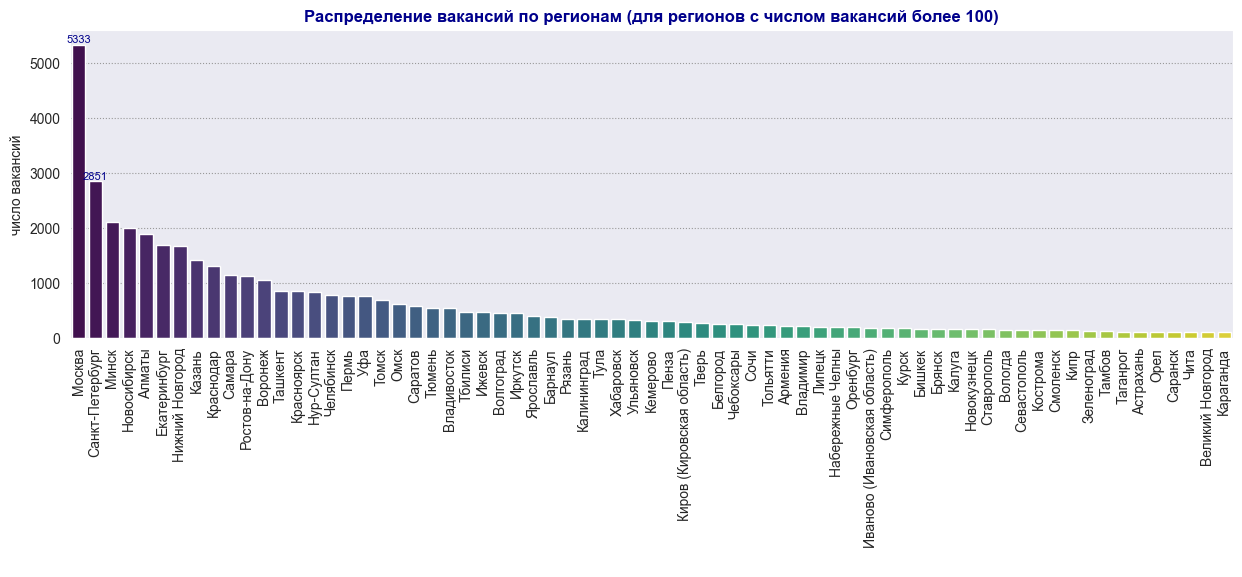

In [12]:
# Построение диаграммы распределения вакансий по регионам
# На диаграмме выведем только те регионы, в которых количество вакансий более 100.
fig = plt.figure(figsize=(15,4))
ax = sns.barplot(vacancies_by_area[vacancies_by_area['vacancy_amount'] > 100],
                 x='area', y='vacancy_amount', palette='viridis')
ax.set_title('Распределение вакансий по регионам (для регионов с числом вакансий более 100)', 
             fontdict={'fontweight': 'bold', 'fontsize': 12, 'color': 'darkblue'})
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel(' ')
ax.set_ylabel('число вакансий', fontdict={'size': 10})
ax.bar_label(ax.containers[0], fontsize=8, color='darkblue')
ax.bar_label(ax.containers[1], fontsize=8, color='darkblue');

2. Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой.

In [13]:
# Число вакансий с хотя бы одним непустым полем зарплаты
query = '''select count(*) cnt from vacancies 
        where (salary_from is not null) or (salary_to is not null)'''
salary_not_null_count = pd.read_sql_query(query, connection) # query execution and saving the result to dataframe
# output the results
print('Число строк с хотя бы одним непустым полем зарплаты: {} (из {} записей таблицы)'.format(
        salary_not_null_count.iloc[0][0], vacancy_count.iloc[0][0]))

Число строк с хотя бы одним непустым полем зарплаты: 24073 (из 49197 записей таблицы)


3. Cредние значения для нижней и верхней границы зарплатной вилки.

In [14]:
# Среднее значение для нижней и верхней границ зарплатной вилки
query = '''select avg(salary_from) avg_from, avg(salary_to) avg_to from vacancies'''
salary_mean = pd.read_sql_query(query, connection) #query execution and saving the result to dataframe

# Output of the results
print(
      'Средние значения границ зарплатной вилки: нижняя -  {:.0f} руб, верхняя - {:.0f} руб'.format(
            salary_mean['avg_from'].iloc[0], salary_mean['avg_to'].iloc[0]))

Средние значения границ зарплатной вилки: нижняя -  71065 руб, верхняя - 110537 руб


4. Количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях.

In [15]:
# Распределение вакансий по совокупности график работы - тип занятости, отсортированные по убыванию числа вакансий
query = '''select schedule, employment, count(id) vacancy_amount 
from vacancies 
group by schedule, employment 
order by vacancy_amount desc'''
vacancy_employment_schedule = pd.read_sql_query(query, connection) # query execution and saving the result to dataframe

print(vacancy_employment_schedule) # output the results

            schedule           employment  vacancy_amount
0        Полный день     Полная занятость           35367
1   Удаленная работа     Полная занятость            7802
2      Гибкий график     Полная занятость            1593
3   Удаленная работа  Частичная занятость            1312
4     Сменный график     Полная занятость             940
5        Полный день           Стажировка             569
6     Вахтовый метод     Полная занятость             367
7        Полный день  Частичная занятость             347
8      Гибкий график  Частичная занятость             312
9        Полный день     Проектная работа             141
10  Удаленная работа     Проектная работа             133
11     Гибкий график           Стажировка             116
12    Сменный график  Частичная занятость             101
13  Удаленная работа           Стажировка              64
14     Гибкий график     Проектная работа              18
15    Сменный график           Стажировка              12
16    Вахтовый

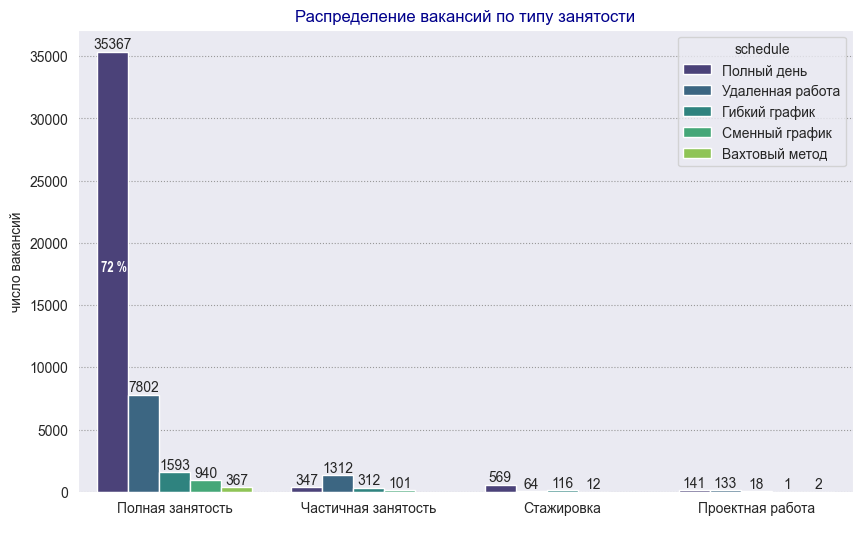

In [16]:
# Столбчатая диаграмма распределения вакансий по типу занятости
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(vacancy_employment_schedule, x='employment',y='vacancy_amount',hue='schedule', palette='viridis')
ax.set_title('Распределение вакансий по типу занятости',
             fontdict={'fontweight': 14, 'color': 'darkblue'})
ax.set_xlabel(' ')
ax.set_ylabel('число вакансий')
# Указываем число вакансий на столбцах диаграммы
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
    
# Процент, который составляет наиболее популярный тип занятости от общего числа вакансий базы
x=ax.containers[0][0].xy[0]+0.02
y=ax.containers[0][0].get_height()/2
label = str(round(vacancy_employment_schedule['vacancy_amount'].max()/vacancy_employment_schedule['vacancy_amount'].sum()*100))+' %'
ax.text(x, y, label, color="w", fontstretch='condensed', fontweight='bold');

In [17]:
#  Процедура построения круговой диаграммы
def pie_subplot(ax, data, labels, title):
    patches, texts, autopcts = ax.pie(data, autopct='%1.1f%%', labels=labels) 
    ax.set_title(title, fontdict={'fontweight': 'bold', 'color': 'maroon'})
    # Удаление текста для секторов диаграммы углом меньше 10 градусов
    for patch, txt, autopct in zip(patches, texts, autopcts):
        autopct.set_color('w')
        if patch.theta2-patch.theta1 < 10.:
            autopct.set_text(txt.get_text()+' ('+autopct.get_text()+')')
            txt.set_text('')
            # the angle at which the text is located
            ang = (patch.theta2 + patch.theta1) / 2
            # new coordinates of the text, 0.7 is the distance from the center 
            x = patch.r * 2.1 * np.cos(ang*np.pi/180)
            y = patch.r * 4.5 * np.sin(ang*np.pi/180) + 0.4
            autopct.set_position((x,y))
            autopct.set_color('black')
            
        elif patch.theta2-patch.theta1 < 20.:
            # the angle at which the text is located
            ang = (patch.theta2 + patch.theta1) / 2.
            # new coordinates of the text, 0.7 is the distance from the center 
            x = patch.r * 0.8 * np.cos(ang*np.pi/180)
            y = patch.r * 0.8 * np.sin(ang*np.pi/180)
            autopct.set_position((x,y))

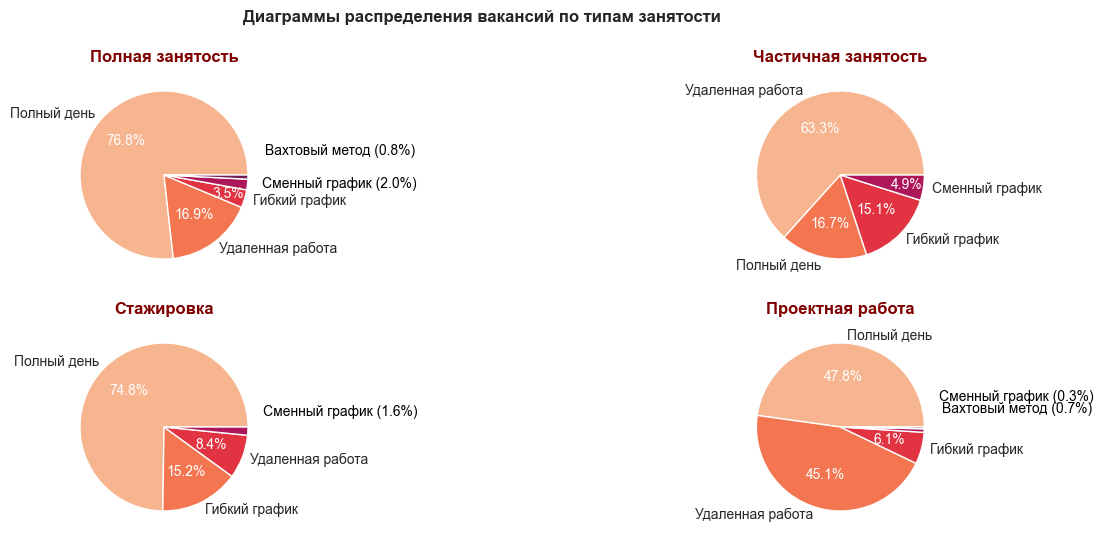

In [18]:
# Построение круговых диаграмм соотношения графиков работы для каждого типа занятости     
fig_pie, axes = plt.subplots(2,2,figsize=(16,6))
fig_pie.suptitle('Диаграммы распределения вакансий по типам занятости', fontsize=12, fontweight='bold')  

# Диаграмма полной занятости
pie_subplot(axes[0][0], vacancy_employment_schedule[vacancy_employment_schedule['employment'] == 'Полная занятость']['vacancy_amount'],
            vacancy_employment_schedule[vacancy_employment_schedule['employment'] == 'Полная занятость']['schedule'], 'Полная занятость')      

# Диаграмма частичной занятости
pie_subplot(axes[0][1], vacancy_employment_schedule[vacancy_employment_schedule['employment'] == 'Частичная занятость']['vacancy_amount'],
            vacancy_employment_schedule[vacancy_employment_schedule['employment'] == 'Частичная занятость']['schedule'], 'Частичная занятость')

# Диаграмма стажировки
pie_subplot(axes[1][0], vacancy_employment_schedule[vacancy_employment_schedule['employment'] == 'Стажировка']['vacancy_amount'],
            vacancy_employment_schedule[vacancy_employment_schedule['employment'] == 'Стажировка']['schedule'], 'Стажировка')

# Диаграмма проектной работы
pie_subplot(axes[1][1], vacancy_employment_schedule[vacancy_employment_schedule['employment'] == 'Проектная работа']['vacancy_amount'],
            vacancy_employment_schedule[vacancy_employment_schedule['employment'] == 'Проектная работа']['schedule'], 'Проектная работа');
#fig_pie.tight_layout();

5. Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [19]:
# Распределение вакансий в зависимости от опыта работы
query = '''select experience, count(id) vacancy_amount 
        from vacancies
        group by experience 
        order by vacancy_amount desc'''
vacancy_by_experience = pd.read_sql_query(query, connection) #query executing and saving the result to dataframe

print(vacancy_by_experience) # output the results

           experience  vacancy_amount
0  От 1 года до 3 лет           26152
1       От 3 до 6 лет           14511
2           Нет опыта            7197
3         Более 6 лет            1337


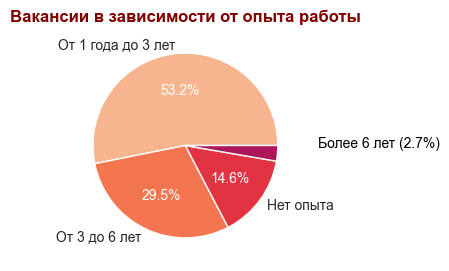

In [20]:
fig, ax = plt.subplots(figsize=(8,3))
#ax = fig.add_axes([-9, 0, 0.75, 1])
pie_subplot(ax,vacancy_by_experience['vacancy_amount'],
        vacancy_by_experience['experience'], 'Вакансии в зависимости от опыта работы')

***

> **Выводы по детальному анализу вакансий**
>
> Детальный анализ вакансий показывает, что 86% вакансий (42068) приходится на 69 городов, являющихся крупными промышленными и административными центрами - это столицы государств или отдельных регионов как России, так и некоторых других стран.  В каждом из данных городов размещено более 100 вакансий.
> 
> На первом по числу вакансий находится Москва - 5333 вакансии, что почти в 2 раза больше, чем в регионе, занимающем второе место - Санкт-Петербурге, где размещена 2851 вакансия. На третьем месте находится Минск. Скорее всего это определилось тем, что в Минске есть крупный IT кластер, а большинство вакансий в данной базе (см. исследование ниже) относится к IT.
>
> По графику работы: 72% вакансий предусматривают традиционный график работы - постоянную работу с полной занятостью. На втором месте оказалась удаленная работа при полной занятости, что говорит об изменении условий труда в связи с развитием интернета, глобализацией. Свою лепту в развитие удаленной работы внес Ковид.
>
>Если рассматривать соотношение графиков работы, то во всех типах занятости, кроме частичной, преобладает полный рабочий день. При частичной занятости 63% вакансий предлагают удаленную работу. В проектной деятельности число вакансий полного рабочего дня (48%) и удаленной работы (45%) практически одинаково. На третьем месте по количеству находятся вакансии с гибким графиком работы.
>
>Неожиданный результат дало распределение вакансий в зависимости от опыта работы: наибольшим спросом пользуются специалисты с опытом работы от года до трех лет (26152 вакансии), на втором месте специалисты с опытом работы от 3 до 6 лет. Возможно, это опять связано с тем, что большинство вакансий в базе так или иначе связано с IT и говорит о бурном развитии данной сферы: возникновение новых направлений, новых бизнесов. Возможно, что распределение вакансий связано с зарплатными возможностями: чем больше опыт работы, тем выше запрос соискателя по зарплате. Наименьшим спросом пользуются специалисты с опытом работы более 6 лет. Для ответа на вопрос почему это так, требуются дополнительные исследования. Предположение: вакансии с таким опытом работы подразумевают руководящие должности и более высокие зарплаты.
>
>По зарплатам: к сожалению, возможная зарплата указана менее, чем у половины вакансий (24073 из 49197 записей таблицы). Средние значения зарплатной вилки не дают возможности для анализа. Здесь больше информации для анализа дадут максимум и минимум, медианное значение зарплаты, а также распределение зарплат по регионам, отраслям, опыту работы и графику.

### **Анализ работодателей**

1. Распределение вакансий в зависимости от работодателей. Какие работодатели находятся на первом и пятом месте по количеству вакансий?

In [21]:
# Распределение вакансий по работодателям
query = '''select em.name, count(v.id) vacancy_amount 
    from employers em, vacancies v
    where v.employer_id=em.id 
    group by em.name 
    order by vacancy_amount desc'''
vacancy_by_employers = pd.read_sql_query(query, connection) #query execution

#Таблица итоговых данных: 
#       Число работодателей с количеством вакансий более 100, ,от 10 до 100, от 2 до 10 и равным 1
#       и суммарное число вакансий для каждого работодателя
vacancy_by_employers_sum = pd.DataFrame({
    'vacancies': ['более 100 вакансий', 'от 11 до 100 вакансий', 'от 2 до 10 вакансий', 'одна вакансия'],
    'employer_amount': [vacancy_by_employers[vacancy_by_employers['vacancy_amount'] > 100]['name'].count(),
                        vacancy_by_employers[(vacancy_by_employers['vacancy_amount'] <= 100)&(
                            vacancy_by_employers['vacancy_amount'] > 10)]['name'].count(),
                        vacancy_by_employers[(vacancy_by_employers['vacancy_amount'] <= 10)&(
                            vacancy_by_employers['vacancy_amount'] > 1)]['name'].count(),
                        vacancy_by_employers[vacancy_by_employers['vacancy_amount'] == 1]['name'].count()
                        ],
    'vacancy_amount': [vacancy_by_employers[vacancy_by_employers['vacancy_amount'] > 100]['vacancy_amount'].sum(),
                       vacancy_by_employers[(vacancy_by_employers['vacancy_amount'] <= 100)&(
                           vacancy_by_employers['vacancy_amount'] > 10)]['vacancy_amount'].sum(),
                       vacancy_by_employers[(vacancy_by_employers['vacancy_amount'] <= 10)&(
                           vacancy_by_employers['vacancy_amount'] > 1)]['vacancy_amount'].sum(),
                       vacancy_by_employers[vacancy_by_employers['vacancy_amount'] == 1]['vacancy_amount'].sum()
                       ]
})



In [22]:
# Output the results
print('Пять работодателей с наибольшим числом вакансий:\n{}'.format(
    vacancy_by_employers.head()))

print('\nЧисло работодателей, разместивших более 100 вакансий: {:>7}'.format(
    vacancy_by_employers_sum['employer_amount'].iloc[0]))
print('{:>26} суммарное число вакансий: {:>8}'.format(
    ' ',vacancy_by_employers_sum['vacancy_amount'].iloc[0]))
print('\nЧисло работодателей, разместивших от 11 до 100 вакансий: {:>4}'.format(
    vacancy_by_employers_sum['employer_amount'].iloc[1]))
print('{:>26} суммарное число вакансий: {:>8}'.format(
    ' ',vacancy_by_employers_sum['vacancy_amount'].iloc[1]))
print('\nЧисло работодателей, разместивших от 2 до 10 вакансий: {:>6}'.format(
    vacancy_by_employers_sum['employer_amount'].iloc[2]))
print('{:>28} суммарное число вакансий: {:>6}'.format(' ',
    vacancy_by_employers_sum['vacancy_amount'].iloc[2]))
print('\nЧисло работодателей, разместивших одну вакансию: {:>12}'.format(
    vacancy_by_employers_sum['employer_amount'].iloc[3]))
print('{:>22} суммарное число вакансий: {:>12}'.format(' ',
    vacancy_by_employers_sum['vacancy_amount'].iloc[3]))

Пять работодателей с наибольшим числом вакансий:
            name  vacancy_amount
0         Яндекс            1933
1     Ростелеком             491
2       Тинькофф             444
3           СБЕР             428
4  Газпром нефть             331

Число работодателей, разместивших более 100 вакансий:      25
                           суммарное число вакансий:     6875

Число работодателей, разместивших от 11 до 100 вакансий:  604
                           суммарное число вакансий:    14389

Число работодателей, разместивших от 2 до 10 вакансий:   5593
                             суммарное число вакансий:  19389

Число работодателей, разместивших одну вакансию:         8544
                       суммарное число вакансий:         8544


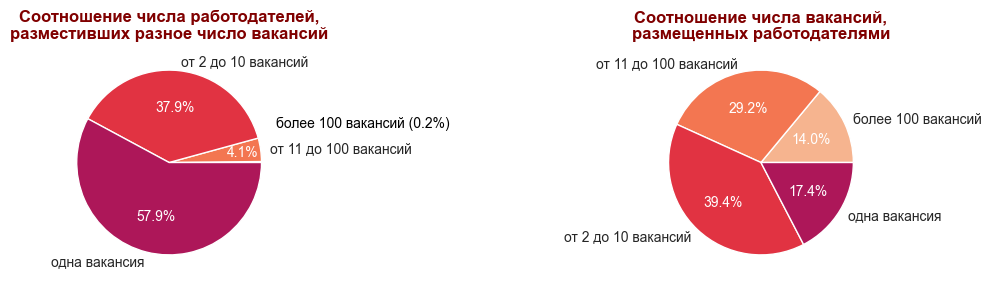

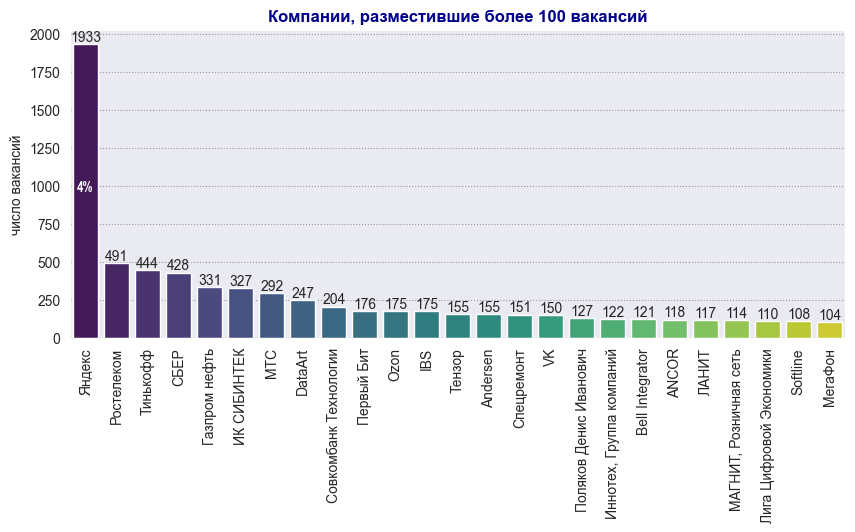

In [23]:
# Диаграмммы распределения вакансий по работодателям
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,3))

# Круговая диаграмма соотношения числа работодателей, разместивших 1 вакансию, до 10 вакансий,  до 100 вакансий, более 100 вакансий
pie_subplot(ax1, vacancy_by_employers_sum['employer_amount'], vacancy_by_employers_sum['vacancies'], 
            'Соотношение числа работодателей,\nразместивших разное число вакансий')
pie_subplot(ax2, vacancy_by_employers_sum['vacancy_amount'], vacancy_by_employers_sum['vacancies'],
            'Соотношение числа вакансий,\nразмещенных работодателями')

# Столбчатая диаграмма 10 компаний,разместивших наибольшее число вакансий
fig1 = plt.figure(figsize=(10,4))
bar = sns.barplot(vacancy_by_employers[vacancy_by_employers['vacancy_amount'] > 100], x='name', y='vacancy_amount', palette='viridis')
bar.set_title('Компании, разместившие более 100 вакансий',
              fontdict={'color': 'darkblue', 'fontweight': 'bold'})
bar.tick_params(axis='x', labelrotation=90)
for i in range(0,25):
    bar.bar_label(bar.containers[i])
bar.set_xlabel('')
bar.set_ylabel('число вакансий');

# Процент, который составляет наиболее популярный тип занятости от общего числа вакансий базы
x=bar.containers[0][0].xy[0]+0.1
y=bar.containers[0][0].get_height()/2
label = str(round(vacancy_by_employers['vacancy_amount'].max()/vacancy_by_employers['vacancy_amount'].sum()*100))+'%'
bar.text(x, y, label, color="w", fontstretch='condensed', fontweight='bold');

2. Количество работодателей и вакансий в каждом регионе.
Среди регионов, в которых нет вакансий, найти тот, в котором наибольшее количество работодателей.

In [24]:
# Распределение работодателей и вакансий по регионам
query = '''select ar.name, count(distinct em.id) employers, count(distinct v.id) vacancies  from areas ar
left join employers em on ar.id=em.area
left join vacancies v on v.area_id=ar.id
group by ar.name
order by count(distinct em.id) desc'''

employer_vacancy_by_area = pd.read_sql_query(query, connection) # query execution and saving into dataframe

In [ ]:
# Таблица итоговых данных
# Число регионов в которых размещают вакансии более 100 работодателей, менее 100 работодателей, ноль работодателей
# Число соответствующих вакансий
employers_by_area_sum = pd.DataFrame({
    'areas': ['более 100 работодателей', 'менее 100 работодателей', 'нет работодателей'],
    'employers': [employer_vacancy_by_area[employer_vacancy_by_area['employers'] > 100]['name'].count(),
                  employer_vacancy_by_area[(employer_vacancy_by_area['employers'] > 0)&(
                      employer_vacancy_by_area['employers'] <= 100)]['name'].count(),
                  employer_vacancy_by_area[employer_vacancy_by_area['employers'] == 0]['name'].count()
                ],
    'vacancies': [employer_vacancy_by_area[employer_vacancy_by_area['employers'] > 100]['vacancies'].sum(),
                  employer_vacancy_by_area[(employer_vacancy_by_area['employers'] > 0)&(
                      employer_vacancy_by_area['employers'] <= 100)]['vacancies'].sum(),
                  employer_vacancy_by_area[employer_vacancy_by_area['employers'] == 0]['vacancies'].sum()
                  ]
})

In [ ]:
# результат запроса
print('Распределение числа работодателей и числа вакансий по регионам(первые двадцать):\n')
print(employer_vacancy_by_area.head(20))

Распределение числа работодателей и числа вакансий по регионам(первые двадцать):

               name  employers  vacancies
0            Москва       5864       5333
1   Санкт-Петербург       2217       2851
2             Минск       1115       2112
3            Алматы        721       1892
4      Екатеринбург        609       1698
5       Новосибирск        573       2006
6            Казань        480       1415
7   Нижний Новгород        426       1670
8            Россия        410          0
9         Краснодар        409       1301
10   Ростов-на-Дону        335       1131
11       Красноярск        331        847
12          Ташкент        326        851
13           Самара        315       1144
14       Нур-Султан        312        840
15        Челябинск        310        786
16          Воронеж        292       1063
17              Уфа        252        767
18            Пермь        250        771
19           Тюмень        218        547


In [ ]:
print('\nРегионы без вакансий, отсортированные по числу работодателей:\n')
print(employer_vacancy_by_area[(employer_vacancy_by_area['vacancies'] == 0)&(
    employer_vacancy_by_area['employers'] > 0)].sort_values(by=['employers'], ascending=False).head(20))


Регионы без вакансий, отсортированные по числу работодателей:

                      name  employers  vacancies
8                   Россия        410          0
21               Казахстан        207          0
49      Московская область         75          0
107     Краснодарский край         19          0
109     Ростовская область         18          0
110               Беларусь         18          0
111            Азербайджан         17          0
115  Нижегородская область         16          0
116   Республика Татарстан         16          0
120             Узбекистан         15          0
148   Белгородская область         10          0
154               Сингапур         10          0
156      Калужская область          9          0
157  Ленинградская область          9          0
176    Воронежская область          7          0
169      Самарская область          7          0
179              Австралия          6          0
184    Ульяновская область          6          0
188  

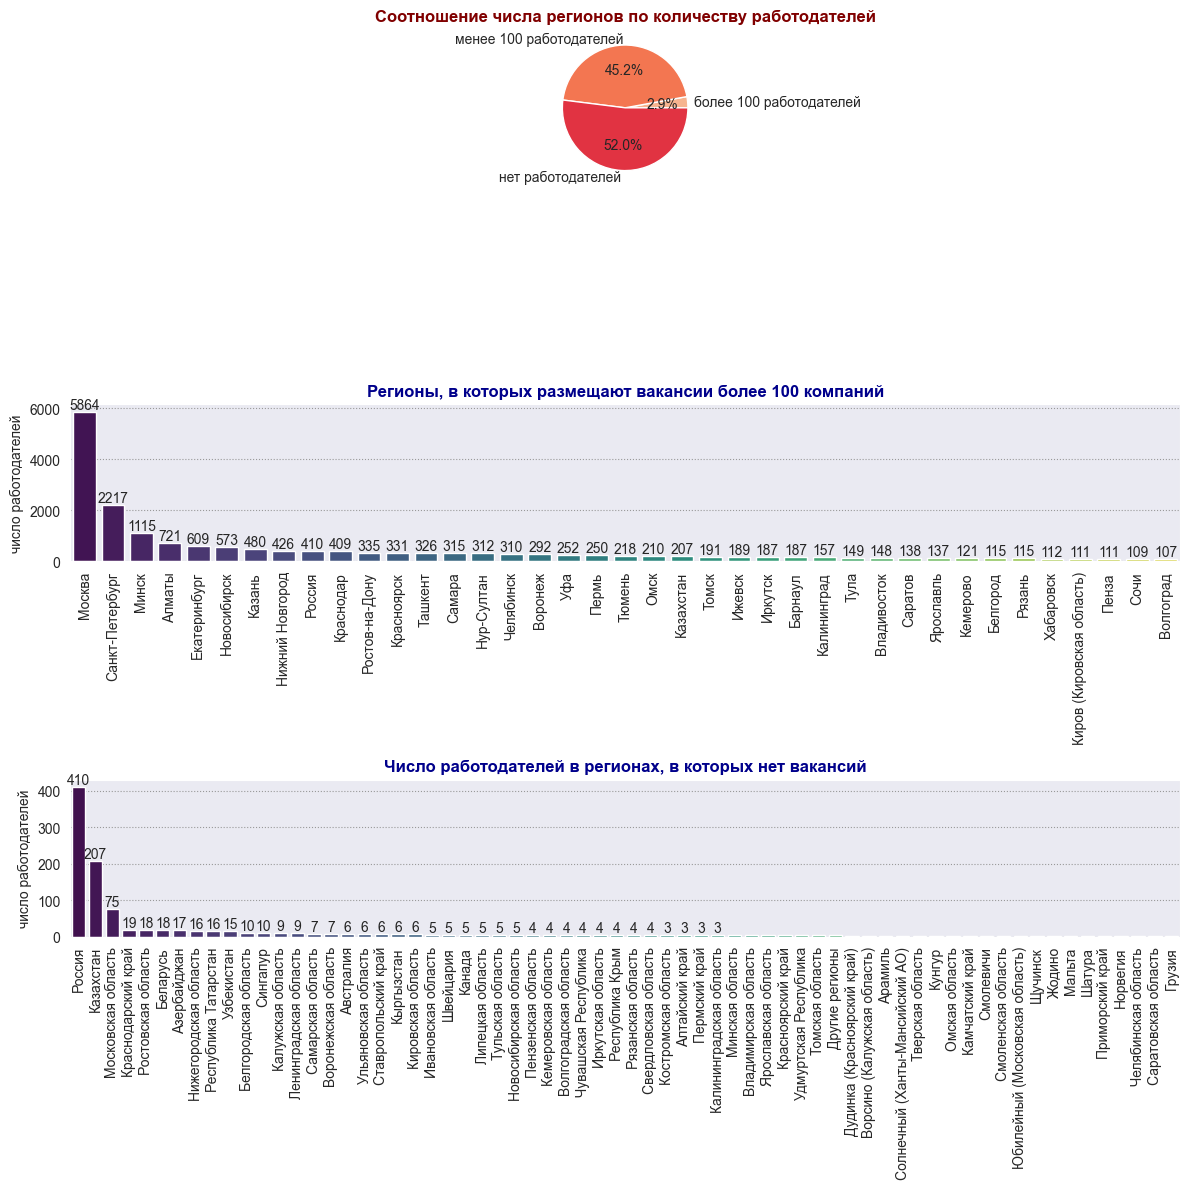

In [ ]:
# Диаграммы распределения работодателей по регионам
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,12))

# Круговая диаграмма соотношения числа регионов с большим количеством вакансий, небольшим количеством вакансий 
# и отсутствием вакансий
ax1.pie(employers_by_area_sum['employers'], autopct='%1.1f%%', labels=employers_by_area_sum['areas'])
ax1.set_title('Соотношение числа регионов по количеству работодателей', fontdict={'fontweight': 'bold', 'color': 'maroon'})

# Диаграмма регионов, в которых размещают вакансии более 100 работодателей.
sns.barplot(employer_vacancy_by_area.iloc[:39], x='name', y='employers', palette='viridis', ax=ax2)
ax2.set_title('Регионы, в которых размещают вакансии более 100 компаний',
              fontdict={'color': 'darkblue', 'fontweight': 'bold'})
ax2.tick_params(axis='x', labelrotation=90)
for i in range(0,39):
    ax2.bar_label(ax2.containers[i])
ax2.set_xlabel('')
ax2.set_ylabel('число работодателей');

# Диаграмма регионов, в которых нет вакансий, но есть работодатели
sns.barplot(employer_vacancy_by_area[(employer_vacancy_by_area['vacancies'] == 0)&(employer_vacancy_by_area['employers'] > 0)].iloc[:66], 
            x='name', y='employers', palette='viridis', ax=ax3)
ax3.set_title('Число работодателей в регионах, в которых нет вакансий',
              fontdict={'color': 'darkblue', 'fontweight': 'bold'})
ax3.tick_params(axis='x', labelrotation=90)
for i in range(0,39):
    ax3.bar_label(ax3.containers[i])
ax3.set_xlabel('')
ax3.set_ylabel('число работодателей');
fig.tight_layout()

3. Количество регионов, в которых каждый работодатель публикует свои вакансии, отсортированный по убыванию.


In [ ]:
# Количество регионов, в которых каждый работодатель публикует вакансии
query = '''select em.name employer, count(distinct v.area_id) areas 
from vacancies v
left join employers em on v.employer_id=em.id
group by em.name order by areas desc'''

area_by_employer_amount = pd.read_sql_query(query, connection) # query execution and saving to dataframe

In [ ]:
# Output of results
print('Число регионов, в которых каждый работодатель публикует вакансии\n')
print(area_by_employer_amount.head(20))

print('\nЧисло работодателей, размещающих вакансии более, чем в одном регионе: {}'.format(
    area_by_employer_amount[area_by_employer_amount['areas'] > 1]['employer'].count()))
print('Число работодателей, размещающих вакансии только в одном регионе: {:>8}'.format(
    area_by_employer_amount[area_by_employer_amount['areas'] == 1]['employer'].count()))

Число регионов, в которых каждый работодатель публикует вакансии

                      employer  areas
0                       Яндекс    181
1                   Ростелеком    152
2                   Спецремонт    116
3       Поляков Денис Иванович     88
4                    ООО ЕФИН      71
5                   Совкомбанк     63
6                          МТС     55
7   ЭФКО, Управляющая компания     49
8                 Почта России     48
9                         КРОН     48
10                 ИК СИБИНТЕК     46
11                       MCORE     46
12             Сбербанк-Сервис     45
13                       ANCOR     44
14                    Тинькофф     43
15                  Первый Бит     43
16                       АЛНАС     41
17                        Ozon     36
18                         IBS     36
19                       Авито     35

Число работодателей, размещающих вакансии более, чем в одном регионе: 2492
Число работодателей, размещающих вакансии только в одном рег

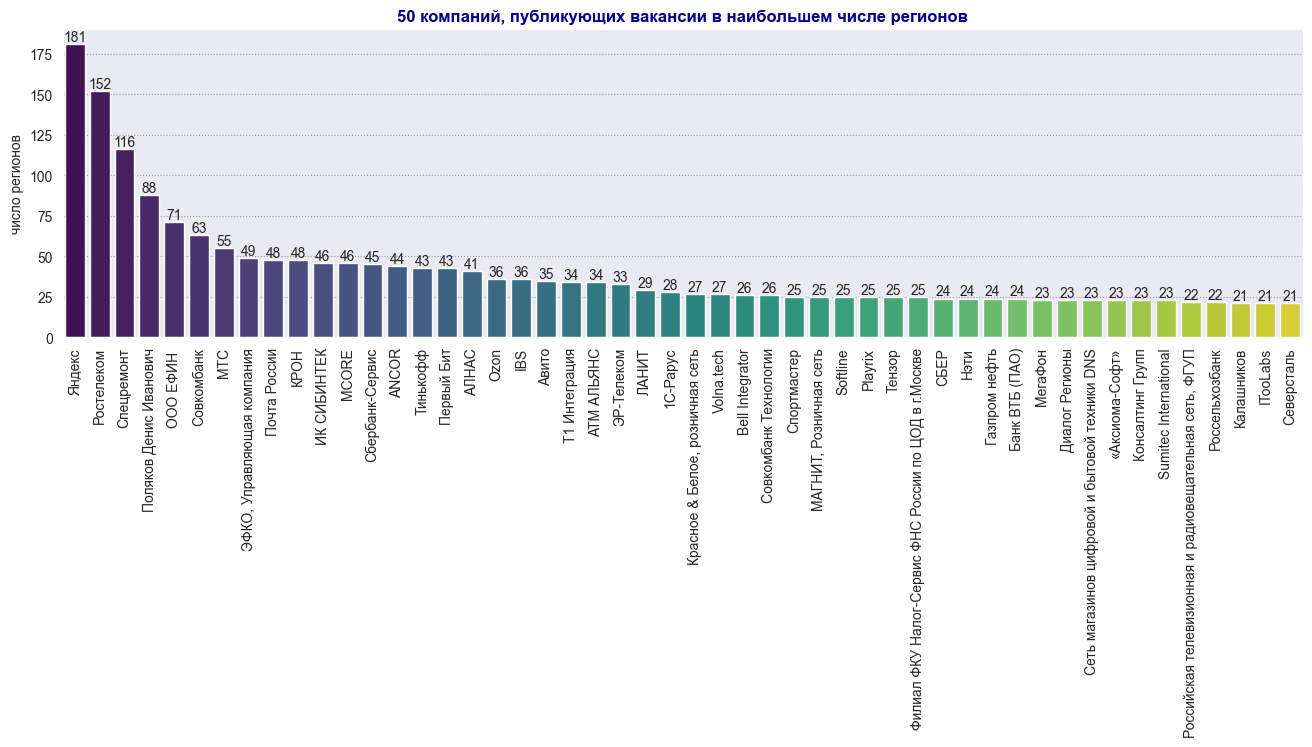

In [ ]:
# Диаграмма 50 компаний, публикующих вакансии в наибольшем числе регионов
fig = plt.figure(figsize=(16,4))
ax = sns.barplot(area_by_employer_amount.iloc[:50], 
            x='employer', y='areas', palette='viridis')
ax.set_title('50 компаний, публикующих вакансии в наибольшем числе регионов',
              fontdict={'color': 'darkblue', 'fontweight': 'bold'})
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('')
ax.set_ylabel('число регионов')
for i in range(50):
    ax.bar_label(ax.containers[i])

4. Количество работодателей, у которых не указана сфера деятельности. 

In [ ]:
# Подсчет числа работодателей, у которых не указана сфера деятельности
query = '''select count(em.id) total  
        from employers em
        left join employers_industries ei on em.id=ei.employer_id
        group by ei.industry_id
        having ei.industry_id is null'''
industry_null = pd.read_sql_query(query, connection) # query execution and saving to dataframe

# Output the results
print('Число работодателей, у которых не указана сфера деятельности:', industry_null['total'][0])
print('({:.1f} % от общего числа работодателей)'.format(industry_null['total'][0]/employer_count.iloc[0][0]*100))

Число работодателей, у которых не указана сфера деятельности: 8419
(35.8 % от общего числа работодателей)


5. Название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [ ]:
# Название третьего по алфавиту работодателя, который работает в 4 сферах детельности
query = '''select em.name employer 
            from employers em
            left join employers_industries ei on em.id=ei.employer_id
            group by em.name
            having count(ei.industry_id)=4 order by employer
            offset 2 limit 1'''
employer_4 = pd. read_sql_query(query, connection) # query execution and saving to dataframe

# Output the results
print('Компания, находящаяся на третьем месте в списке работодателей, работающих в 4-х сферах детельности:', employer_4['employer'][0])

Компания, находящаяся на третьем месте в списке работодателей, работающих в 4-х сферах детельности: 2ГИС


6. У какого количества работодателей в качестве сферы деятельности указана "Разработка программного обеспечения"?


In [ ]:
# Число работодателей работающих в сфере разработки ПО
query = '''select ind.name industry, count(ei.employer_id) employers_cnt 
    from employers_industries ei
    left join industries ind on ei.industry_id=ind.id
    group by ind.name
    having ind.name='Разработка программного обеспечения'
    '''
employer_soft_development = pd.read_sql_query(query, connection) # query executing and saving to dataframe

# Output the results
print('Число работодателей, работающих в сфере разработки ПО:', employer_soft_development.iloc[0]['employers_cnt'])
#print(employer_soft_development)
print('({:.1f} % от общего числа работодателей)'.format(employer_soft_development.iloc[0]['employers_cnt']/employer_count.iloc[0][0]*100))

Число работодателей, работающих в сфере разработки ПО: 3553
(15.1 % от общего числа работодателей)


7. Список городов-миллионников, в которых представлены вакансии компании Яндекс, вместе с количеством вакансий в этих регионах и общим числом вакансий по этим регионам отсоротированный по возрастанию.

   Список городов-милионников взят из [статьи Википедии "Города-миллионеры России"](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8).

In [ ]:
# Get the list of city-millioneers

# import nesessary libraries
import requests
from bs4 import BeautifulSoup as BS

# request for parsing
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
page = BS(response.text, 'html.parser') # get HTML-page

table = page.find('table', class_="standard sortable") # get the table of cities
data = table.find_all('td') # get the list of data cells from the table

city_list = [] # List of cities form the table
for item in data[1::6]:
    city_list.append(item.text)
    
city_string = "('"+"','".join(city_list)+"')" # make the string for query

In [ ]:
# Число вакансий Яндекса в городах-миллионниках
query = '''(select ar.name city, count(v.id) vacancies from vacancies v
left join employers em on v.employer_id=em.id
left join areas ar on v.area_id=ar.id
where ar.name in '''+city_string+''' and em.name='Яндекс'
group by ar.name)
union all
(select 'total',count(v.id) vacancise from vacancies v
left join employers em on v.employer_id=em.id
left join areas ar on v.area_id=ar.id
where ar.name in '''+city_string+''' and em.name='Яндекс'
) order by vacancies'''

yandex_region_vacancies = pd.read_sql_query(query, connection) #query execution and saving to database

# Output the result
print('Число вакансий Яндекс в городах-миллионниках:\n',yandex_region_vacancies)

Число вакансий Яндекс в городах-миллионниках:
                city  vacancies
0              Омск         21
1         Челябинск         22
2        Красноярск         23
3         Волгоград         24
4             Пермь         25
5            Казань         25
6    Ростов-на-Дону         25
7               Уфа         26
8            Самара         26
9         Краснодар         30
10          Воронеж         32
11      Новосибирск         35
12  Нижний Новгород         36
13     Екатеринбург         39
14  Санкт-Петербург         42
15           Москва         54
16            total        485


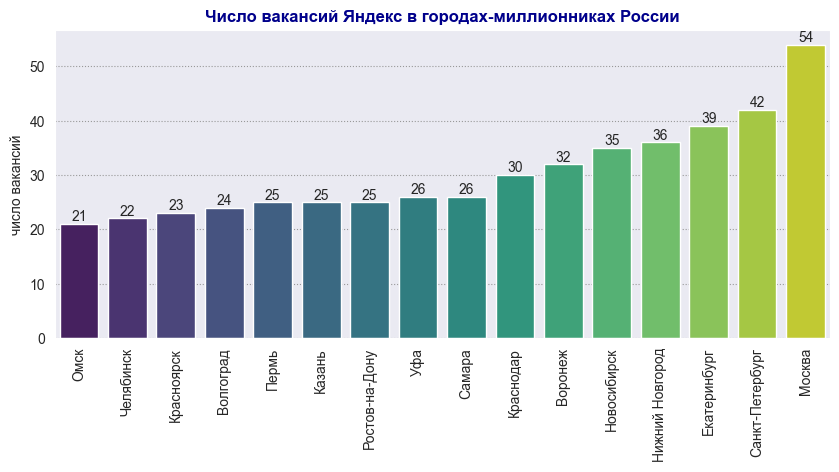

In [ ]:
# Диаграмма распределения вакансий Яндекс в городах_миллионниках России
fig = plt.figure(figsize=(10,4))
ax = sns.barplot(yandex_region_vacancies[yandex_region_vacancies['city'] !='total'], 
            x='city', y='vacancies', palette='viridis')
ax.set_title('Число вакансий Яндекс в городах-миллионниках России',
              fontdict={'color': 'darkblue', 'fontweight': 'bold'})
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('')
ax.set_ylabel('число вакансий')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])

***

> **Выводы по детальному анализу работодателей**
>
> Как показывает исследование, большая часть работодателей (57,9%) разместила на рынке одну вакансию, что, однако, составляет всего 17,4% от числа всех вакансий, 37,9% компаний разместили от 2 до 10 вакансий, что составляет 39,4% всех вакансий; только 25 компаний (0,2%) разместили на рынке более 100 вакансий, что составляет почти пятую часть - 17,4% всех вакансий. Этими работодателями являются крупнейшие российские компании, работающие преимущественно в сфере высоких технологий: IT-компании (Яндекс, Ростелеком, VK), операторы мобильной связи(MTC, Мегафон), крупные банки (СБЕР, Тинькофф), две государственные компании (Газпром и Спецремонт); кроме того, более 100 вакансий разместили торговая сеть Магнит и сетевое кафе Andersen. В списке есть работодатель Поляков Денис Иванович, разместивший 127 вакансий. Возможно, необходимо провести дополнительное исследование по данному работодателю.
>
> Распределение вакансий по регионам также неравномерно: только в 2,9% публикуют вакансии более 100 компаний. В 45,2% регионов размещают вакансии менее 100 работодателей и 52% регионов в базе не имеют работодателей. Однако детальный анализ распеределения работодателей и вакансий по регионам показывает, что регионы без работодателей и вакансий - это названия областей, краев или стран, например, Россия, Казахстан, Краснодарский край и т. п. Работодатели в вакансиях обычно указывают город.
>
> Крупнейшими регионами-работодателями являются большие города - столицы государств или региональные центры. На первом месте по числу работодателей находится Москва (5864 работодателя). На втором месте -  Санкт-Петербург с количеством работодателей 2217. Третьим по числу работодателей стал Минск (1115 работодателей).
>
> У 8419 компаний (35,8% от числа всех работодателей) не указана сфера деятельности. 3553 работодателя работают в сфере разработки программного обеспечения (15,1% от общего числа работодателей). Здесь имеет смысл провести более подробные исследования, показывающие, в каких сферах деятельности работают компании, соотношение числа вакансии по различным сферам деятельности.
>
> Крупнейшим работодателем является компания Яндекс, разместившая 1933 вакансии (4% всех вакансий базы) в 181 регионе. Первые три позиции по числу вакансий занимают крупнейшие города России. На первом месте по числу вакансий Яндекс находится Москва (54 вакансии), затем Санкт-Петербург (42 вакансии) и Екатеринбург (39 вакансий).
> 

### **Предметный анализ**
_Исследование вакансий, относящихся к Data Science._

1. Сколько вакансий имеет отношение к данным?

In [ ]:
# Число вакансий, имеющих отношение к данным
query = '''select count(name) from vacancies where lower(name) like '%data%' or lower(name) like '%данн%'
        '''
data_related_vacancies_count = pd.read_sql_query(query, connection)

# Вывод результатов
print('Число вакансий, имеющих отношение к данным:', data_related_vacancies_count['count'][0])
print('({:.1f}% от общего числа вакансий)'.format(data_related_vacancies_count['count'][0]/vacancy_count.iloc[0][0]*100))

Число вакансий, имеющих отношение к данным: 1771
(3.6% от общего числа вакансий)


In [ ]:
# Число вакансий в области Data Science
query = '''select count(*) from vacancies 
                where lower(name) like '%data scientist%' or lower(name) like '%data science%' 
                or lower(name) like '%исследователь данных%' or (name like '%ML%' and name not like '%HTML%') 
                or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%'
                '''
ds_vacancy_count = pd.read_sql_query(query, connection)

# Вывод результатов
print('Число вакансий в области data science:', ds_vacancy_count['count'][0])
print('({:.1f}% от числа вакансий, имеющих отношение к данным)'.format(ds_vacancy_count['count'][0]/data_related_vacancies_count['count'][0]*100))

Число вакансий в области data science: 480
(27.1% от числа вакансий, имеющих отношение к данным)


2. Число вакансий для начинающего дата-сайентиста.
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:
# дополнительный запрос для выборки вакансий Data Science
ds_vacancies = '''with ds_vacancies as 
                (select * from vacancies 
                where lower(name) like '%data scientist%' or lower(name) like '%data science%' 
                or lower(name) like '%исследователь данных%' or (name like '%ML%' and name not like '%HTML%') 
                or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%') 
                '''

In [ ]:
# Вакансии Data Science для Junior
query = ds_vacancies + '''select count(*) from ds_vacancies 
        where lower(name) like '%junior%' or employment='Стажировка' or experience='Нет опыта'
        '''
junior_ds_vacancy_count = pd.read_sql_query(query, connection)
# Вывод результатов
print('Число вакансий для начинающих data scientist:',junior_ds_vacancy_count['count'][0])
print('({:.1f}% от числа вакансий data science)'.format(junior_ds_vacancy_count['count'][0]/ds_vacancy_count['count'][0]*100))

Число вакансий для начинающих data scientist: 51
(10.6% от числа вакансий data science)


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# Число вакансий DS с ключевым навыком "SQL" или "postreg"
query = ds_vacancies + '''select count(*) from ds_vacancies 
        where key_skills like '%SQL%' or lower(key_skills) like '%postgres%'
        '''
sql_skill_ds_vacancy_count = pd.read_sql_query(query, connection)
# Вывод результатов
print('Число вакансий data schientist со знанием SQL:', sql_skill_ds_vacancy_count['count'][0])
print('({:.1f}% от числа вакансий data science)'.format(sql_skill_ds_vacancy_count['count'][0]/ds_vacancy_count['count'][0]*100))

Число вакансий data schientist со знанием SQL: 201
(41.9% от числа вакансий data science)


4. Насколько популярен Python в требованиях работодателей к DS?

In [ ]:
# Число вакансий DS с ключевым навыком Python
query = ds_vacancies + '''select count(*) from ds_vacancies where key_skills like '%Python%'
        '''
python_skill_ds_vacancy_count = pd.read_sql_query(query, connection)
# Вывод результатов
print('Число вакансий со знанием Python:', python_skill_ds_vacancy_count['count'][0])
print('({:.1f}% от числа вакансий data science)'.format(python_skill_ds_vacancy_count['count'][0]/ds_vacancy_count['count'][0]*100))

Число вакансий со знанием Python: 351
(73.1% от числа вакансий data science)


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?

In [ ]:
# Среднее число навыков, указываемых в вакансиях DS
query = ds_vacancies + '''select avg(array_length(regexp_split_to_array(key_skills,'\t'),1)),
        max(array_length(regexp_split_to_array(key_skills,'\t'),1)),
        min(array_length(regexp_split_to_array(key_skills,'\t'),1))
        from ds_vacancies'''
key_skills_ds = pd.read_sql_query(query, connection)
# Вывод результатов
print('Среднее число ключевых навыков в вакансиях data scientist: {:>10.2f}'.format(key_skills_ds['avg'][0]))
print('Максимальное число ключевых навыков в вакансиях data scientist: {:.2f}'.format(key_skills_ds['max'][0]))
print('Минимальное число ключевых навыков в вакансиях data scientist: {:>6.2f}'.format(key_skills_ds['min'][0]))

Среднее число ключевых навыков в вакансиях data scientist:       6.41
Максимальное число ключевых навыков в вакансиях data scientist: 20.00
Минимальное число ключевых навыков в вакансиях data scientist:   1.00


6. Средняя зарплата Data science для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
# Средняя зарплата в зависимости от опыта работы
query = ds_vacancies + ''' select experience, avg(coalesce((salary_from+salary_to)/2,salary_from,salary_to)) salary
from ds_vacancies where salary_from is not null or salary_to is not null
group by experience'''
salary_avg_by_experience = pd.read_sql_query(query, connection)

# Вывод результатов
len = salary_avg_by_experience.shape[0]

for i in range(len):
    print('{:^}: {:.2f}'.format(salary_avg_by_experience.iloc[i]['experience'],salary_avg_by_experience.iloc[i]['salary']))

От 3 до 6 лет: 243114.67
От 1 года до 3 лет: 139674.75
Нет опыта: 74642.86


***

> **Выводы по анализу вакансий в области Data science**
> 
> В базе имеется 1771 вакансия, имеющая отношение к работе с данными, что составляет 3,6% от общего числа вакансий. Из них 480 вакансий для дата-сайентистов (27,1% от числа вакансий, имеющих отношение к данным), причем 51 вакансия (10,6%) для начинающих дата-сайентистов.
>
> Среднее число ключевых навыков для дата-сайентиста равно 6, максимальное - 20, минимальное - 1. В 201 вакансии (41,9%) требуется знание SQL или postreg.
В 351 вакансии (73,1%) требуется знание Python.
>
> Средняя зарплата вакансий в области DS для соискателей без опыта работы равна 74642.86 рублей, для соискателей с опытом работы от года до трех лет - 139674.75, от 3 до 6 лет - 243114.67 рублей. В запросе не указана средняя зарплата для соискателей с опытом работы более 6 лет. Возможно, для таких вакансий не указана зарплатная вилка, а, возможно, это связано с тем, что направление DS новое и специалистов с опытом работы более 6 лет нет. Этот вопрос требует дополнительного исследования.
>

# Общий вывод по проекту

> Исследования данных показали, что наибольшее число вакансий сосредоточено в больших городах - столицах государств и региональных центрах. На первом месте по количеству как вакансий, так и работодателей находится Москва (10,8% всех вакансий и 25% всех работодателей), затем идут Санкт-Петербург и Минск. 
>
> Наиболее популярным типом занятости является полная занятость/полный рабочий день (72% всех вакансий базы). На втором месте по популярности находится удаленная работа: 16,9% вакансий полной занятости, 45,1% вакансий проектной деятельности; для частичной занятости удаленная работа стоит на первом месте по числу вакансий (63,3% всех вакансий частичной занятости). Скорее всего, это связано с активным переходом на удаленную работу в период ковида, а также развитием IT и интернет технологий.
>
> По опыту работы для 53,2% всех вакансий требуется опыт от 1 года до трех лет; опыт от 3 до 6 лет работы необходим для 29,5% вакансий; 14,6% всех вакансий не требуют опыт работы. Только в 2,7% вакансий требуется опыт более 6 лет. Поскольку опытные работники требуются на позиции ведущих специалистов или руководителей, таких вакансий меньше всего.
>
> Средняя зарплатная вилка вакансий базы: от 71065 до 110537 рублей. Средние значения в данном случае не дают значимой информации. Для получения полного обзора зарплат на рынке труда, имеет смысл провести более детальное исследование: выяснить расброс зарплат в базе, сравнить зарплаты по отраслям деятельности, компаниям-работодателям, регионам, типу занятости, опыту работы.
>
> Наибольшее число работодателей в данной базе являются российскими (410 компаний) (что неудивительно, так как изучаемая база данных принадлежит российскому агенству). На втором месте находится Казахстан (207 компаний), что говорит о тесном экономическом сотрудничестве наших стран. Если посмотреть распределение вакансий по регионам, то суммарное число вакансий по двум крупнейшим городам Казахстана (Алма-Аты и Нур-Султан) составляет 2732, что почти догоняет число вакансий в Санкт-Петербурге (2851).
> 
> Из 23501 работодателя в БД у более, чем трети (8419) не указана сфера деятельности (возможно, ее можем определить по характеру вакансий), у некоторых указано более одной сферы деятельности. Здесь возможны варианты, как компания работает в нескольких направлениях одной сферы (например, разработка ПО, сопровождение ПО), так и холдинг, работающий в разных направлениях (например Яндекс как разработчик ПО, Яндекс-браузер, Яндекс-доставка). Требуются дополнительные исследования. Возможно, имеет смысл, сделать поле 'сфера деятельности' обязательным для заполнения при размещении вакансии, что сделает данные более структурированными и облегчит поиск вакансий и рекомендации для соискателей.
>
> Крупнейшими работодателями в данной базе являются крупные межрегиональные российские холдинги, большинство из которых работают в сфере высоких технологий: Яндекс, Ростелеком, Тинькофф, Газпром, VK и т. д. 
>
> На первом месте по всем параметрам располагается компания Яндекс: 1933 вакансии в 181 регионе, что составляет 4% всех вакансий. Вакансии компании есть во всех российских городах-миллионниках, наибольшее число (54) в Москве.
>
> Наблюдается определенная корреляция между размером города и числом вакансий в нем: чем крупнее город, тем больше в нем вакансий и работодателей. Можно провести дополнительное исследование для проверки данной гипотезы.
>
> Детальный анализ вакансий показал, что 3,6% вакансий базы относятся к сфере работы с данными, 27% из них - вакансии Data Science. Среднее число ключевых навыков, требуемых для специалистов DS - 6, максимальное число ключевых навыков DS - 20. В 70% вакансий в качестве ключевого навыка заявлено знание python, в 41% - знание SQL или postreg.  Здесь имеет смысл провести дополнительные исследования для получения более полной картины основных требований к соискателям в области DS.
>
> 10% вакансий Data Science не требуют опыта работы. Средняя зарплата по вакансиям DS Junior 74642.86 рублей. Для вакансий от года до трех средняя зарплата равна 139674.75 рублей, от 3 до 6 лет -  243114.67. Вакансий DS с опытом работы более 6 лет в базе нет. Возможно, это связано с тем, что исследование данных - сравнительно новая сфера деятельности.
>
> Если сравнить средние зарплаты DS специалистов со средними значениями зарплатной вилки по базе, то получается, что только для позиций junior средняя зарплата находится внутри средней зарплатной вилки ближе к ее нижнему значению. Если опыт работы соискателя более 1 года, то его средняя зарплата выше средней по базе. 
>
> В данном исследовании проведен детальный анализ вакансий Data Science, однако, для более полной картины имеет смысл посмотреть какой процент вакансий в данной базе занимают вакансии в сфере IT, провести сравнительный анализ зарплат в различных сферах IT и сравнить результаты с данными, полученными для вакансий дата-сайентистов.
>

### Данные о числе вакансий и значении заработной платы в разных сферах IT

In [ ]:
# Дополнительные запросы для выборок из БД

# Вакансии для разработчиков ПО
programming_vacancies = '''programming_vacancies as
(select * from vacancies 
where lower(name) like '%developer%' or lower(name) like '%development%' or lower(name) like '%разработчик%' or 
lower(name) like '%разработк%' or lower(name) like '%программист%'
except
select * from vacancies
where lower(name) like '%database%' or name like '% DB%' or lower(name) like '%баз%данных%' 
or name like '%БД%' or lower(name) like '%business development%' 
or lower(name) like '%data%' or lower(name) like '%данн%')
'''

# Вакансии для специалистов в других областях IT (администрирование, поддержка, итп)
it_spec_vacancies = '''it_spec_vacancies as
(select * from vacancies 
where lower(name) like '%support%' or lower(name) like '%customer service%' or
lower(name) like '%help%desk%' or lower(name) like '%тех%поддержк%' or 
lower(name) like '%system administrator%' or lower(name) like '%системный администратор%' or
lower(name) like 'it specialist' or lower(name) like 'it engineer' or lower(name) like '%it project manager%' or
lower(name) like 'it специалист' or lower(name) like 'it инженер' or lower(name) like '%менеджер it%проекта%')
'''

# Вакансии для специалистов в области обработки данных
data_vacancies = '''data_vacancies as
(select * from vacancies where lower(name) like '%data%' or lower(name) like '%данн%' or
name like '% DB%' or name like '%БД%')'''

In [ ]:
# Создание итоговой таблицы средних зарплат и вакансий в сфере IT

query = 'with '+ programming_vacancies + ''' select 'development' employment, count(*) vacancies,
round(avg(salary_from),2) salary_min_avg, 
round(avg(salary_to),2) salary_max_avg, 
round(avg(coalesce((salary_from+salary_to)/2,salary_from,salary_to)), 2) salary_avg
from programming_vacancies
union ''' + '(with '+ it_spec_vacancies + ''' select 'it_specialists' employment, count(*) vacancies,
round(avg(salary_from),2) salary_min_avg, 
round(avg(salary_to),2) salary_max_avg, 
round(avg(coalesce((salary_from+salary_to)/2,salary_from,salary_to)), 2) salary_avg
from it_spec_vacancies) 
union ''' + '(with '+ data_vacancies+ ''' select 'data_specialists' employment, count(*) vacancies,
round(avg(salary_from),2) salary_min_avg, 
round(avg(salary_to),2) salary_max_avg, 
round(avg(coalesce((salary_from+salary_to)/2,salary_from,salary_to)), 2) salary_avg
from data_vacancies) 
union '''+ ''' (select 'total_vacancies' employment, count(*) vacancies,
round(avg(salary_from),2) salary_min_avg, 
round(avg(salary_to),2) salary_max_avg, 
round(avg(coalesce((salary_from+salary_to)/2,salary_from,salary_to)), 2) salary_avg
from vacancies)
order by vacancies'''

salary_result_df = pd.read_sql_query(query, connection) # Создание итоговой таблицы

In [ ]:
salary_result_df

,employment,vacancies,salary_min_avg,salary_max_avg,salary_avg
0,data_specialists,1888,101601.15,131832.82,116388.04
1,it_specialists,5134,47701.27,59294.22,52315.03
2,development,15912,97165.12,155508.80,118897.23
3,total_vacancies,49197,71064.66,110536.74,84314.87


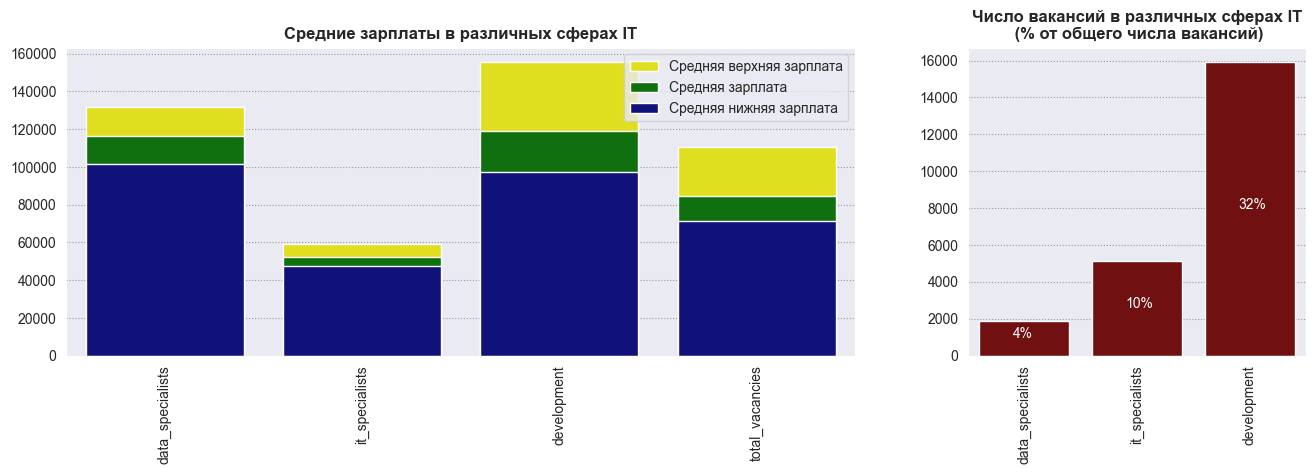

In [ ]:
# Диаграмма распределения зарплат и числа вакансий в разных сферах IT
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4), width_ratios=[0.7, 0.3])

# Диаграмма зарплат
sns.barplot(y=salary_result_df['salary_max_avg'], x=salary_result_df['employment'], label='Средняя верхняя зарплата', color='yellow', ax=ax1)
sns.barplot(y=salary_result_df['salary_avg'], x=salary_result_df['employment'], label='Средняя зарплата', color='green', ax=ax1)
sns.barplot(y=salary_result_df['salary_min_avg'], x=salary_result_df['employment'], label='Средняя нижняя зарплата', color='darkblue', ax=ax1)
ax1.set_title('Средние зарплаты в различных сферах IT', fontsize=12, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', labelrotation=90)
ax1.legend()

# Диаграмма вакансий
total_vac = salary_result_df.iloc[-1]['vacancies'] # Общее число вакансий базы
vac_pct = salary_result_df.iloc[:-1]['vacancies'].apply(lambda x: round(x/total_vac * 100)).to_list() #Проценты вакансий IT от общего числа вакансий

sns.barplot(y=salary_result_df.iloc[:-1]['vacancies'], x=salary_result_df.iloc[:-1]['employment'], color='maroon', ax=ax2)
ax2.set_title('Число вакансий в различных сферах IT\n (% от общего числа вакансий)', fontsize=12, fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', labelrotation=90)
#Добавляем в диаграмму метки процентов вакансий IT от общего числа вакансий
for i, container in enumerate(ax2.containers[0]):
    x = container.xy[0]+container.get_width()/2-0.1
    y = container.get_height()/2
    ax2.text(x, y, str(vac_pct[i])+'%', color='w');


> Как показывает исследование, наибольшее число вакансий в сфере IT (32% всех вакансий базы) относится к сфере разработки ПО, и у этих вакансий самая высокая зарплатная вилка в IT (от 97165.12 руб до 155508.80 руб в среднем, средняя ЗП составляет 118897.23 руб). Нижняя средняя граница для разработчиков (97165.12 руб) выше средней верхней зарплатной границы по всей базе (84314.87 руб).
>
> Около 10% вакансий базы относятся к различным сферам IT (консалтинг, администраторы сетей и компьютерных систем и т. п.), но для этих вакансий зарплатная вилка - наименьшая в IT (от 47701.27 руб до 59294.22 руб в среднем, средняя ЗП составляет 52315.03). Значения зарплатной вилки в этом секторе ниже средних значений зарплат по всей базе.
>
> Для специалистов по работе с данными в базе имеется около 4% вакансий (3,6%, согласно исследованиям выше). Средние значения зарплат для специалистов по данным выше средних значений по базе: нижняя средняя граница, равная 101601.15 руб, выше средней ЗП по всей базе, равной 84314.87 руб, средняя зарплата, равная 131832.82 руб, выше верхней средней границы по всей базе в 110536.74 руб. Верхняя средняя граница зарплат для специалистов по данным ниже, чем у разработчиков, но и разброс зарплат меньше, чем в сфере разработки (нижняя и средняя зарплаты для разработчиков и для специалистов по данным примерно равны, а вот верхняя граница у разработчиков значительно выше).
>
>Cогласно исследованиям выше, вакансии Data Science составляют 27% от всех специалистов в области данных - это примерно 1% всех вакансий базы. 

In [ ]:
# Закрытие коннекта
connection.close()